# Classification de patients souffrant d’un cancer.

In [701]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

from math import sqrt
from sklearn import svm
from sklearn.linear_model import LogisticRegression

### Réaliser l'analyse exploratoire des données

In [702]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [703]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Visualiser les données

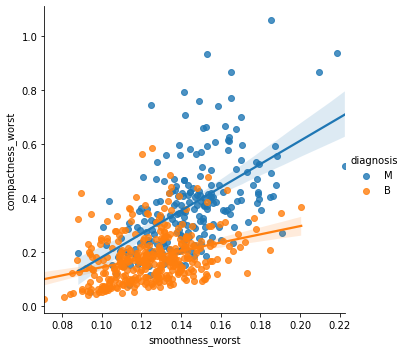

In [704]:
sns.lmplot(x ='smoothness_worst', y = 'compactness_worst', data = data, hue = 'diagnosis')

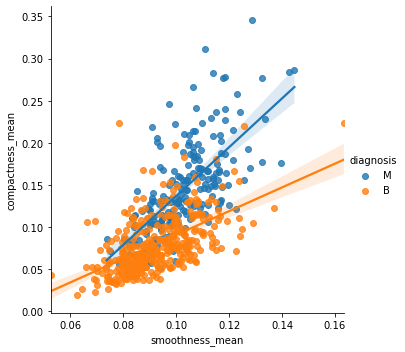

In [705]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = data, hue = 'diagnosis')

#### Commentaires:
les 2 graphiques ci-dessus, montrent que les données ne suivent pas une distrbution linéaire. 

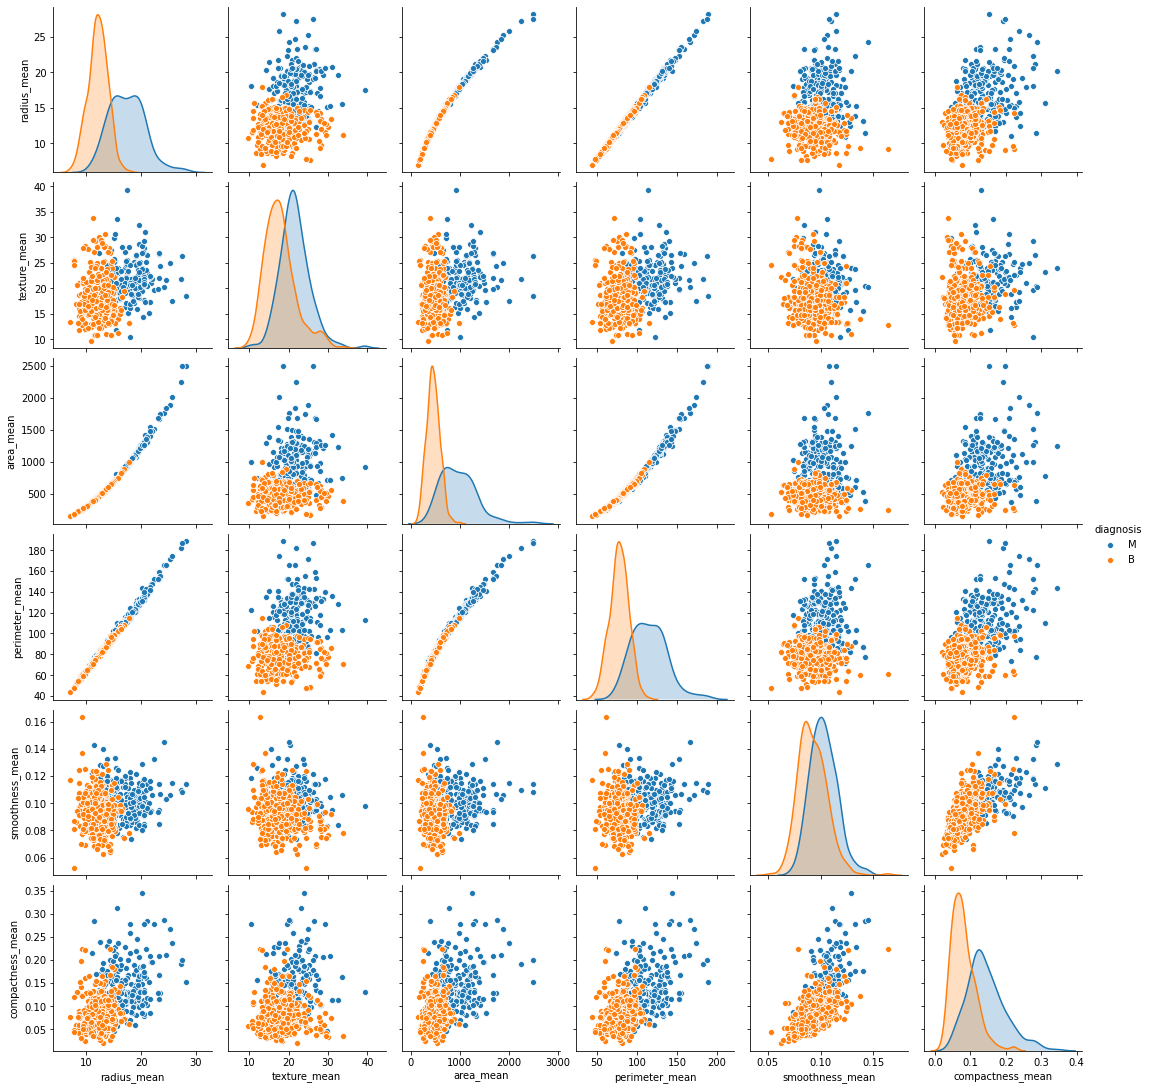

In [706]:
sns.pairplot(data, hue = 'diagnosis',
             vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean'])

### Déclarer le vecteur de caractéristiques et la variable cible

#### 1. Encoder la variable Y

In [707]:
Y = data['diagnosis'].replace({'M':1, 'B':0})

#### 2. Definir la variable X

In [708]:
X = data.iloc[:,2:-1]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Divisez les données en un ensemble d'entraînement et de test séparé

In [709]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=8)

### Feature engineering (Ingénierie des fonctionnalités)

In [710]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

### Prédire les résultats du test

In [711]:
y_pred = KNN.predict(X_test)
y_pred_show = pd.DataFrame(y_pred)
y_pred_show.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [712]:
y_pred_proba = pd.DataFrame(KNN.predict_proba(X_test))
y_pred_proba.head(10)

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.9,0.1
4,1.0,0.0
5,1.0,0.0
6,0.8,0.2
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


#### Commentaire:
* y predict -> donne la classe prédite selon le model utilisé.
* y predict proba -> donne la probabilité que la classe 0 soit prédite. 

### Vérifiez le score de précision

In [713]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        85
           1       0.96      0.86      0.91        58

    accuracy                           0.93       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



### Vérifiez le score de précision nulle

In [714]:
print(y_test.value_counts())

0    85
1    58
Name: diagnosis, dtype: int64


In [715]:
precision_nulle = (85/(85+58))
print("precision_nulle = ", round(precision_nulle,3))

precision_nulle =  0.594


In [716]:
accuracy_pondérée_0 = round(accuracy_score(y_test,y_pred)* (85/(85+58)),3)
print("l'accuracy de prédire la classe la plus fréquente =",accuracy_pondérée_0)

l'accuracy de prédire la classe la plus fréquente = 0.553


In [717]:
accuracy_pondérée_1 = round(accuracy_score(y_test,y_pred)*(58/(85+58)),3)
print("l'accuracy de prédire la classe la moins fréquente =", accuracy_pondérée_1)

l'accuracy de prédire la classe la moins fréquente = 0.377


### Matrice de confusion

[[83  8]
 [ 2 50]]


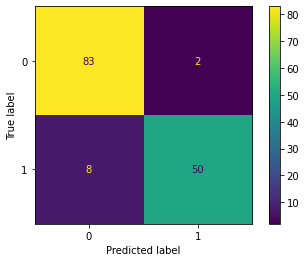

In [718]:
cm = confusion_matrix(y_pred,y_test)
print(cm)
plot_confusion_matrix(KNN,X_test,y_test)

### Feature scaling

In [719]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

In [720]:
KNN.fit(Xs_train,y_train)
ys_pred = KNN.predict(Xs_test)

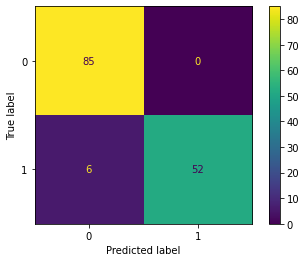

In [721]:
plot_confusion_matrix(KNN,Xs_test,y_test)

In [722]:
print(classification_report(y_test, ys_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        85
           1       1.00      0.90      0.95        58

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



### Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k 

#### Fonction de calcul d'accuracy Sans Standard Scaler en fonction de l'évolution de k

In [723]:
liste_k = [3,7,10,15,25,35,45,55,99,150,200]
score = []
def KNN_calculator(liste_k):
    for k in liste_k:
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(X_train,y_train)
        y_pred = KNN.predict(X_test)
        accuracy_score(y_test,y_pred)
        score.append(round(accuracy_score(y_test,y_pred),3))

In [724]:
KNN_calculator(liste_k)

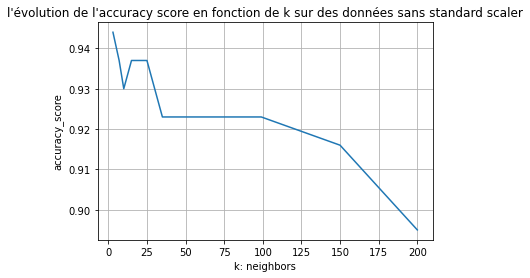

In [725]:
fig,ax = plt.subplots()
ax.plot(liste_k, score)

ax.set(xlabel='k: neighbors', ylabel='accuracy_score',
       title="l'évolution de l'accuracy score en fonction de k sur des données sans standard scaler")
ax.grid()
plt.show()

#### Fonction de calcul d'accuracy Avec Standard Scaler en fonction de l'évolution de k

In [726]:
liste_k1 = [3,7,10,15,25,35,45,55,99,150,200]
score1 = []
def KNN_calculator_scaled1(liste_k):
    for k in liste_k1:
        scaler = StandardScaler()
        Xs_train = scaler.fit_transform(X_train)
        Xs_test = scaler.transform(X_test)
        
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(Xs_train,y_train)
        y_pred = KNN.predict(Xs_test)
        accuracy_score(y_test,y_pred)
        
        score1.append(round(accuracy_score(y_test,y_pred),3))

In [727]:
KNN_calculator_scaled1(liste_k)

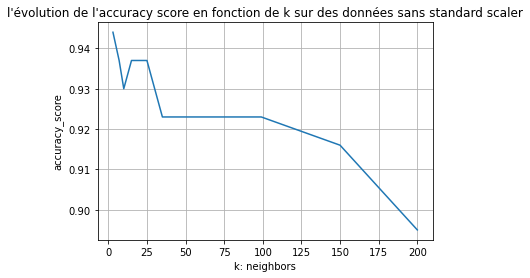

In [728]:
fig,ax = plt.subplots()
ax.plot(liste_k, score)

ax.set(xlabel='k: neighbors', ylabel='accuracy_score',
       title="l'évolution de l'accuracy score en fonction de k sur des données sans standard scaler")
ax.grid()
plt.show()

In [731]:
liste_k1 = [3,7,10,15,25,35,45,55,99,150,200]
print("Accuracy SANS standard scaler=",score)
print("Accuracy AVEC standard scaler=",score1)

Accuracy SANS standard scaler= [0.944, 0.937, 0.93, 0.937, 0.937, 0.923, 0.923, 0.923, 0.923, 0.916, 0.895]
Accuracy AVEC standard scaler= [0.972, 0.965, 0.958, 0.972, 0.958, 0.944, 0.944, 0.93, 0.895, 0.895, 0.867]


#### Commentaires: 
On observe que l'accuracy score est meilleur avec Standard Scaler. 
l'accuracy score baisse en fonction de k. 
un meilleur score k est obtenu pour k = 3
pour k compris entre 35 et 99, l'accuracy score est inchangé.ensuite il continue à baisser. 

### ROC - AUC

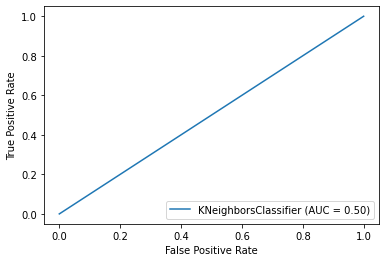

In [732]:
from sklearn.metrics import plot_roc_curve
#metrics.plot_roc_curve(KNN, X_test, y_test)
#plt.show()
plot_roc_curve(KNN, X_test, y_test)
plt.show()

#### Commentaires: 
la courbe ROC mesure l'efficacité d'un model de prédiction à travers l'espace entre l'axe des abcisses et la courbe. sur ce graphique, on voit que les 2 courbes se démarquent bien. ce qui laisser présager que le modél utilisé est efficace.

 ### Utiliser la validation croisée K-Fold

In [661]:
k=5
n=100

kf = KFold(n_splits=n)
A_score = []
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.loc[train_index], X.loc[test_index]
    y_train_kf, y_test_kf = Y[train_index], Y[test_index]
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_kf,y_train_kf)
    y_pred_kf = KNN.predict(X_test_kf)
    A_score.append(accuracy_score(y_test_kf,y_pred_kf))

print("Moyenne de l'accuracy score = ",round((np.mean(A_score)),4))
print("l'écart type de l'accuracy score =",round(np.std(A_score),3))

Moyenne de l'accuracy score =  0.93
l'écart type de l'accuracy score = 0.113


### Implémenter votre propre algorithme KNN. 

In [662]:
#charger les données:
X_KNN = X.values
Y_KNN = Y.values
X_train_model,X_test_model,y_train_model,y_test_model = train_test_split(X_KNN,Y_KNN, test_size=0.25, random_state=0)
#Initialiser k au nombre de plus proches voisins choisi
k = 5

In [663]:
sc = StandardScaler()
X_train_model = sc.fit_transform(X_train_model)
X_test_model = sc.transform(X_test_model) #avoid data leakage

In [664]:
class KNN_model():
    def __init__(self,k):
        self.k=k
        print(self.k)

    def fit_model(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train

    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
        return sqrt(distance)

    def nearest_neighbors(self,test_sample):
        distances=[]#calculate distances from a test sample to every sample in a training set
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
            distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
        neighbors=[]
        for i in range(self.k): #get first k samples
            neighbors.append(distances[i][0])
        return neighbors
    
    
    def predict_model(self,test_set):
        predictions=[]
        for test_sample in test_set:
            neighbors=self.nearest_neighbors(test_sample)
            labels=[sample for sample in neighbors]
            prediction=max(labels,key=labels.count)
            predictions.append(prediction)
        return predictions

In [665]:
model=KNN_model(10) #our model
model.fit_model(X_train_model,y_train_model)
y_pred_model = model.predict_model(X_test_model)

10


In [666]:
print(classification_report(y_test_model, y_pred_model))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



#### Commentaires:
* accuracy sans Standard Scaler = 0.93 
* accuracy avec Standard Scaler = 0.96 
* accuracy du model implémenté = 0.95

le model implémenté donné des meilleurs résultat que ceux où on utilise pas de standard scaler. 

### Comparer les résultats avec un autre algorithme de classification

#### 1.SVM:

In [667]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9300699300699301
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        85
           1       1.00      0.83      0.91        58

    accuracy                           0.93       143
   macro avg       0.95      0.91      0.93       143
weighted avg       0.94      0.93      0.93       143



2. Regression logistique:

In [668]:
#Y = data['diagnosis'].replace({'M':1, 'B':0})
#X = data.iloc[:,2:-1]
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=8)
clf = LogisticRegression().fit(X,Y)
y_predict= clf.predict(X_test)
print(round(accuracy_score(y_test,y_pred),3))
print(classification_report(y_test, y_pred))

0.93
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        85
           1       1.00      0.83      0.91        58

    accuracy                           0.93       143
   macro avg       0.95      0.91      0.93       143
weighted avg       0.94      0.93      0.93       143



/home/wiem/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Commentaires:
on remarque que l'accuracy de SVM et Regression logistic est équivalente à celle du KNN sans Standard Scaler.

### Résultats et conclusion

Le model KNN semble être adapté à ce genre de prématique (médicale) cependant, on remarque qu'il a tendance à prédire la classe la plus fréquente. 